#  Layer Explaination

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt 
from tensorflow.keras import datasets


%matplotlib inline

In [4]:
(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

In [10]:
image = train_x[0]

In [11]:
image.shape

(28, 28)

[batch_size, height, width, channel] 이렇게 이루어져 있으니까, 차원을 앞뒤로 하나씩 늘려주자, 지금 이미지의 차원은 [28,28] 임 

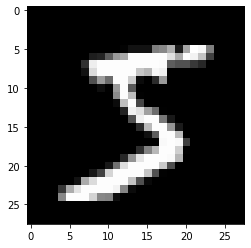

In [12]:
plt.imshow(image, 'gray')
plt.show()

In [13]:
image = image[tf.newaxis, ..., tf.newaxis]
image.shape

(1, 28, 28, 1)

In [14]:
tf.keras.layers.Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='SAME', activation='relu')

In [16]:
image = tf.cast(image, dtype=tf.float32)
image.dtype

tf.float32

In [18]:
layer = tf.keras.layers.Conv2D(3, 3, 1, padding='SAME')
layer

In [19]:
output = layer(image)
output

<tf.Tensor: shape=(1, 28, 28, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype

In [60]:
import numpy as np



In [30]:
np.min(image), np.max(image)

(0.0, 255.0)

In [31]:
np.min(output), np.max(output)

(-136.24649, 179.44551)

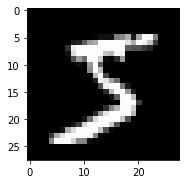

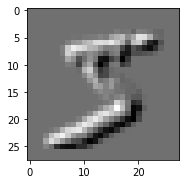

In [26]:
plt.subplot(1,2,1)
plt.imshow(image[0, :, :, 0], 'gray')
plt.show()
plt.subplot(1,2,2)
plt.imshow(output[0, :, :, 0], 'gray')
plt.show()

###  weight 불러오기 ! 

- layer.get_weights()

In [33]:
weight = layer.get_weights()
weight

[array([[[[-0.27442062,  0.39257228,  0.35138524]],
 
         [[-0.3517176 ,  0.07866475,  0.12602949]],
 
         [[ 0.1808654 ,  0.23803377, -0.25943953]]],
 
 
        [[[-0.02392936, -0.34726498, -0.12903741]],
 
         [[ 0.13045096,  0.11532843, -0.31999528]],
 
         [[ 0.40450317,  0.05235341,  0.13649261]]],
 
 
        [[[-0.09785891, -0.06204507,  0.12910825]],
 
         [[ 0.11767161,  0.14395738,  0.13888294]],
 
         [[ 0.00438014, -0.3798405 ,  0.03499547]]]], dtype=float32),
 array([0., 0., 0.], dtype=float32)]

In [36]:
weight[0].shape, weight[1].shape # 첫번째 인덱스가 weight, 두번째 인덱스값이 바이어스! 

((3, 3, 1, 3), (3,))

<function matplotlib.pyplot.show(close=None, block=None)>

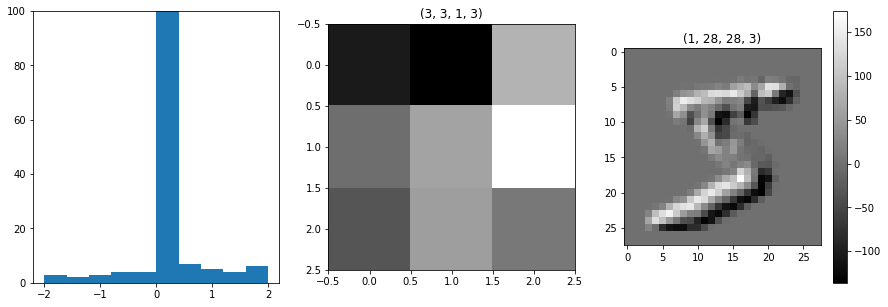

In [55]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.hist(output.numpy().ravel(), range=[-2, 2])
plt.ylim(0, 100)

plt.subplot(1, 3, 2)
plt.title(weight[0].shape)
plt.imshow(weight[0][:, :, 0, 0], 'gray')

plt.subplot(1, 3, 3)
plt.title(output.shape)
plt.imshow(output[0, :, :, 0], 'gray')
plt.colorbar()
plt.show

###  ReLU 함수 사용 하기 ! 

In [57]:
act_layer = tf.keras.layers.ReLU()
act_output = act_layer(output)

In [58]:
act_output 

<tf.Tensor: shape=(1, 28, 28, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype

In [67]:
np.min(act_output),np.max(act_output) # 렐루 함수 거쳐서 0 이하는 전부 0 으로 리턴 

(0.0, 179.44551)

<function matplotlib.pyplot.show(close=None, block=None)>

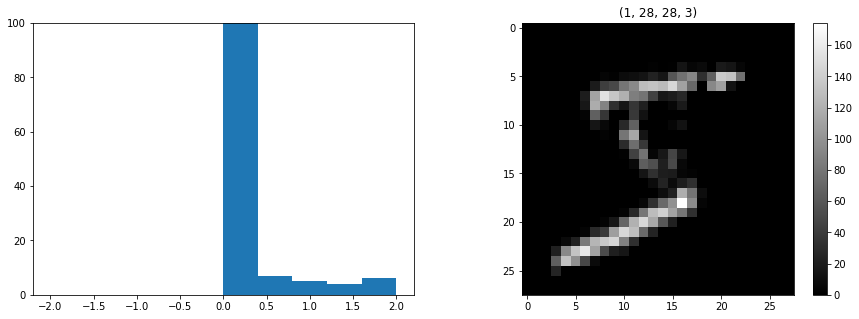

In [72]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.hist(act_output.numpy().ravel(), range=[-2, 2])
plt.ylim(0, 100)

plt.subplot(1,2 , 2)
plt.title(act_output.shape)
plt.imshow(act_output[0, :, :, 0], 'gray')
plt.colorbar()
plt.show

##  Pooling ! 
 마치 압축과도 같다고 생각을 하면 됨 ! 이번엔 맥스풀링을 해보기! 

In [74]:
tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='SAME')

In [75]:
pool_layer = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='SAME')
pool_output = pool_layer(act_output)

In [77]:
act_output.shape 

TensorShape([1, 28, 28, 3])

In [76]:
pool_output.shape # 이렇게 반으로 줄어듬! 

TensorShape([1, 14, 14, 3])

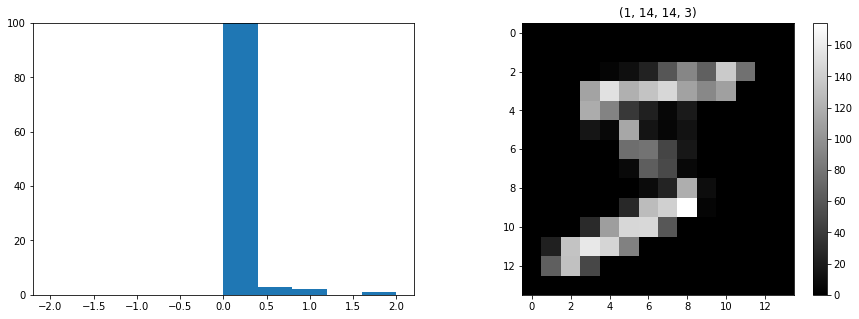

In [83]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.hist(pool_output.numpy().ravel(), range=[-2, 2])
plt.ylim(0, 100)

plt.subplot(1, 2, 2)
plt.title(pool_output.shape)
plt.imshow(pool_output[0, :, :, 0], 'gray')
plt.colorbar()
plt.show()